Import Libraries

In [78]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency


Load Dataset

In [48]:
df= pd.read_csv('All50StatesData_Cleaned.xls')

View Dataset

In [50]:
df.head()

,Gender,Race,VeteranStatus,DisabilityStatus,EmploymentStatus,IndustrySector,OccupancyStatus,MortgageStatus,TotalHouseholdIncome,HealthCoverage,HighestEducationLevel,Count,State,LeadingParty,LeadSum,LeadAvg,TargetParty,TargetVotes
0,Female,American Indian/Alaska Native,Not Veteran,Without Disability,Employed,Arts and Entertainment,Owner-occupied,With Mortgage,"$75,000-$99,999",With Health Insurance,"Some college, no degree",1,Massachusetts,Democrat,314,24.153846,Democratic,13565788.0
1,Female,American Indian/Alaska Native,Not Veteran,Without Disability,Employed,Manufacturing,Owner-occupied,With Mortgage,"$75,000-$99,999",With Health Insurance,Graduate or professional degree,1,Massachusetts,Democrat,314,24.153846,Democratic,13565788.0
2,Female,American Indian/Alaska Native,Not Veteran,Without Disability,Employed,Other Services,Owner-occupied,With Mortgage,"$100,000-$149,999",With Health Insurance,Graduate or professional degree,1,Massachusetts,Democrat,314,24.153846,Democratic,13565788.0
3,Female,American Indian/Alaska Native,Not Veteran,Without Disability,Employed,Public Administration,Owner-occupied,Without Mortgage,"$100,000-$149,999",With Health Insurance,"Some college, no degree",1,Massachusetts,Democrat,314,24.153846,Democratic,13565788.0
4,Female,Asian,Not Veteran,Without Disability,Employed,Agriculture,Owner-occupied,With Mortgage,"$50,000-$74,999",With Health Insurance,High school graduate,1,Massachusetts,Democrat,314,24.153846,Democratic,13565788.0


In [53]:
df.describe()

,Count,LeadSum,LeadAvg,TargetVotes
count,3.582146e+07,3.582146e+07,3.582146e+07,3.582146e+07
mean,1.432815e+00,2.905428e+02,1.115059e+01,1.145170e+07
std,1.185015e+00,2.239918e+02,6.974586e+00,7.774662e+06
min,1.000000e+00,2.000000e+00,2.000000e+00,2.440010e+05
25%,1.000000e+00,8.200000e+01,4.232143e+00,4.319677e+06
50%,1.000000e+00,2.490000e+02,9.228571e+00,1.068050e+07
75%,1.000000e+00,4.060000e+02,1.466667e+01,1.792966e+07
max,1.510000e+02,7.060000e+02,2.940000e+01,3.811688e+07


**Count**:

**Count**: 35,821,460 observations are available for this variable.
**Mean**: The average value is approximately 1.43. This suggests that the Count variable is predominantly a binary or categorical variable with a high frequency of values around 1 (indicating many occurrences).
**Standard Deviation (std)**: Approximately 1.19, indicating that there is some variability in the Count values but not excessively large compared to the mean.
**Min**: The minimum value is 1, while the maximum is 151. This indicates that the counts are concentrated mostly in the lower range with a few outliers.
Percentiles:
25%: 25% of the observations are less than or equal to 1.
50% (Median): 50% of the observations are less than or equal to 1.
75%: 75% of the observations are less than or equal to 1.

**LeadSum:**

**Count**: 35,821,460 observations.
**Mean**: The average value is approximately 290.54.
**Standard Deviation (std)**: Approximately 223.99, indicating a high level of variability in the LeadSum.
**Min**: The minimum value is 2 and the maximum is 706.
Percentiles:
25%: 25% of the observations are less than or equal to 82.
50% (Median): 50% of the observations are less than or equal to 249.
75%: 75% of the observations are less than or equal to 406.

**LeadAvg**:

**Count**: 35,821,460 observations.
**Mean**: The average value is approximately 11.15.
**Standard Deviation (std)**: Approximately 6.97, indicating moderate variability.
**Min**: The minimum value is 2, while the maximum is 29.
Percentiles:
25%: 25% of the observations are less than or equal to 4.23.
50% (Median): 50% of the observations are less than or equal to 9.23.
75%: 75% of the observations are less than or equal to 14.67.

**TargetVotes**:

**Count**: 35,821,460 observations.
**Mean**: The average value is approximately 11,451,700 votes.
**Standard Deviation (std)**: Approximately 7,774,662, indicating a very high variability in TargetVotes.
**Min**: The minimum value is 244,001 while the maximum is 38,116,880.
Percentiles:
25%: 25% of the observations are less than or equal to 4,319,677.
50% (Median): 50% of the observations are less than or equal to 10,680,500.
75%: 75% of the observations are less than or equal to 17,929,660.

***Interpretation***

Count: This variable appears to be binary or categorical in nature, indicating a high frequency of a certain value (likely related to the presence of a characteristic or event).
LeadSum and LeadAvg: These variables show a wide range, and the standard deviations suggest considerable variation in lead values across observations, which may indicate different contexts or conditions in your dataset.
TargetVotes: This variable has a very high mean and significant variability, indicating that some states or demographics are associated with substantially higher vote counts than others.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35821461 entries, 0 to 35821460
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Gender                 object 
 1   Race                   object 
 2   VeteranStatus          object 
 3   DisabilityStatus       object 
 4   EmploymentStatus       object 
 5   IndustrySector         object 
 6   OccupancyStatus        object 
 7   MortgageStatus         object 
 8   TotalHouseholdIncome   object 
 9   HealthCoverage         object 
 10  HighestEducationLevel  object 
 11  Count                  int64  
 12  State                  object 
 13  LeadingParty           object 
 14  LeadSum                int64  
 15  LeadAvg                float64
 16  TargetParty            object 
 17  TargetVotes            float64
dtypes: float64(2), int64(2), object(14)
memory usage: 4.8+ GB


**Summary**

The dataset contains a mix of categorical (object) and numerical (int64, float64) variables.
The categorical variables are likely important for understanding demographic and socio-economic factors influencing voting behavior and election outcomes.
The numerical columns (Count, LeadSum, LeadAvg, and TargetVotes) are essential for quantitative analysis, potentially enabling insights into voting trends and patterns.

In [11]:
df.shape

(35821461, 18)

Multivariate Analysis

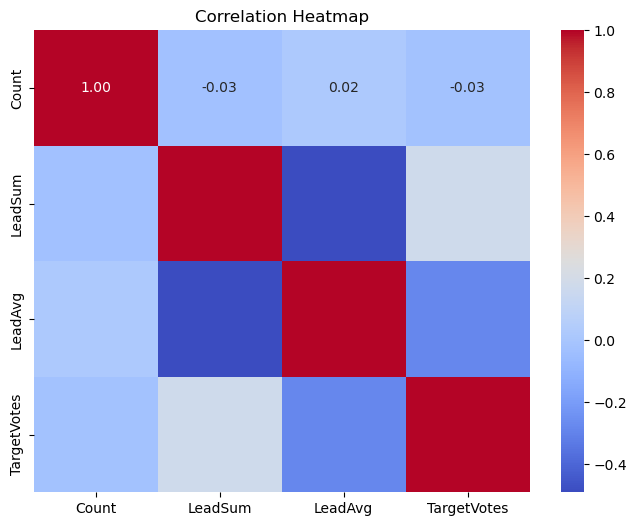

In [17]:
numerical_cols = ['Count', 'LeadSum', 'LeadAvg', 'TargetVotes']

# Drop rows with missing values in the numerical columns
df_numerical = df[numerical_cols].dropna()

# Compute correlation matrix
corr_matrix = df_numerical.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f',annot_kws={"size": 10})  # fmt='.2f' to format numbers
plt.title('Correlation Heatmap')
plt.show()

In [49]:
# Clean string formatting (e.g., removing commas)
for col in numerical_cols:
    df[col] = df[col].str.replace(',', '')  # Remove commas if any
    df[col] = df[col].str.strip()  # Remove leading/trailing spaces

AttributeError: Can only use .str accessor with string values!

Unique values in Count:
[  1   2   3   4   5   6   7   8  10  12  11  14   9  15  13  16  17  18
  19  23  22  21  20  26  24  25  29  27  38  30  34  36  31  28  32  33
  35  39  41  37  48 125  42 118  56  44  43 109 115  46  40  57 105  53
 112  59 127 116  50  51  99  47 106  45  54 102  52  90  68 111 124  55
 126  49 103 129 130 122 104  97  61 143 135 151 150 113 123 110 138 101
  92 107 119  94  63 108 114 128  98 141 132 120  58  60 100  96  66 121
 131 117 142  80  89  83  75  86  93  87  67  78  88  81  84  91  82  79
  77  76  95  74  65  73  69  70  64  62  71  72  85]
Data type of Count: int64

Unique values in LeadSum:
[314 571 152  13 112 267 129 554 125  43  63 105 675  18  85  24  41 494
 680  71 249 591 114 323  82  33 706 106 128  61 263 406 198 147 237 133
 549  17  27  22  19  94  72   2  16  44 528]
Data type of LeadSum: int64

Unique values in LeadAvg:
[24.15384615  3.10326087  5.06666667 13.         12.44444444 17.8
 14.33333333  4.69491525  5.95238095  7.16666

C:\Users\seren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

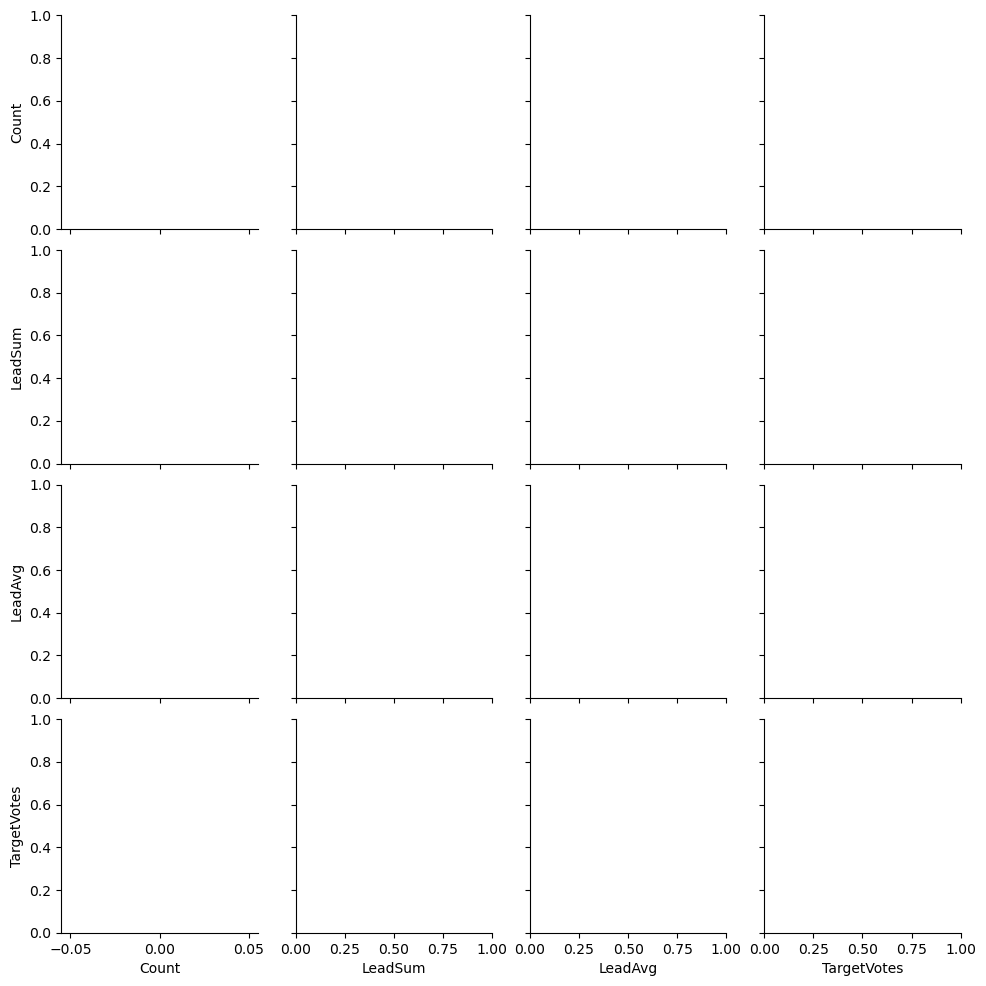

In [51]:


# Select only numerical columns for pairplot
numerical_cols = ['Count', 'LeadSum', 'LeadAvg', 'TargetVotes']

# Step 1: Check unique values and data types in the numerical columns
for col in numerical_cols:
    print(f"Unique values in {col}:")
    print(df[col].unique())  # Check unique values
    print(f"Data type of {col}: {df[col].dtype}\n")  # Check data type

# Step 2: Convert to numeric, coercing errors to NaN
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check for NaN values after conversion
print("Number of NaN values after conversion:")
print(df[numerical_cols].isnull().sum())

# Drop rows with missing values in the numerical columns
df_cleaned = df[numerical_cols].dropna()

# Step 3: Check the data types again to confirm conversion
print("\nData types after dropping NaNs:")
print(df_cleaned.dtypes)

# Ensure that we have valid data for the pairplot
if not df_cleaned.empty:
    # Step 4: Create the pairplot
    sns.pairplot(df_cleaned, diag_kind='kde')
    plt.show()
else:
    print("No valid data available for pairplot after cleaning.")



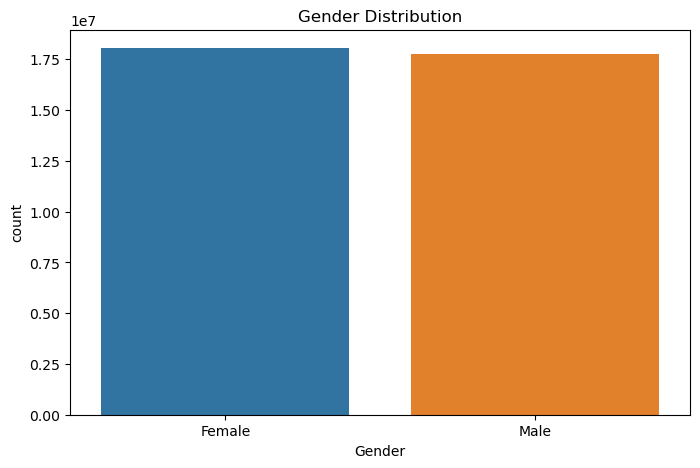

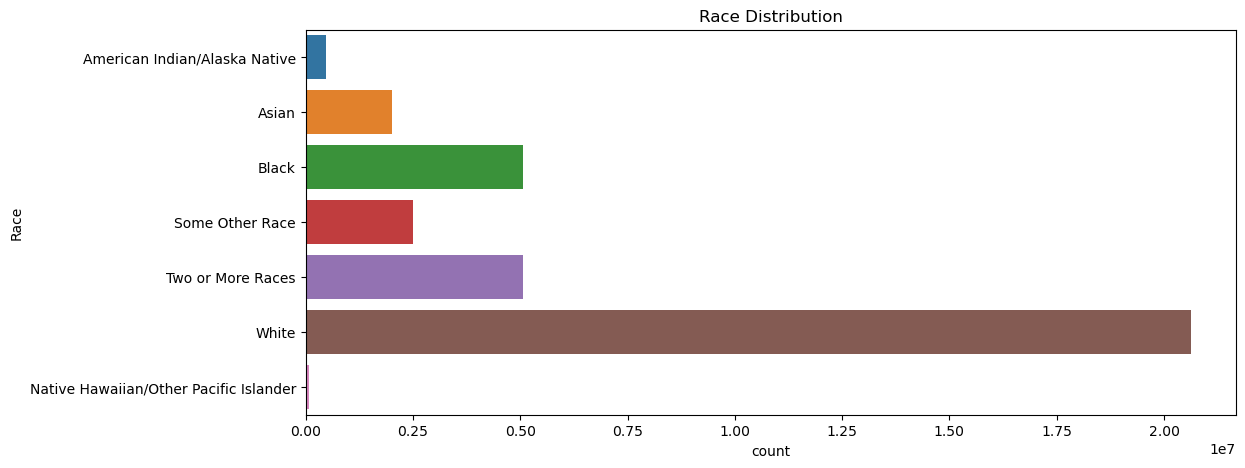

In [76]:
# Visualizing Gender Proportion
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

# Visualizing Race Proportion
plt.figure(figsize=(12, 5))
sns.countplot(y='Race', data=df)
plt.title('Race Distribution')
plt.show()

Gender Distribution: We can see that the proportion of both the male and female genders are distributed equally in the dataset
Race Distribution: It is observed that the proportion of whites leads followed by black and two or more races with fairly the same proportion. 

Chi-Square Test:
Chi2 Stat: 0.04478412705276922
p-value: 0.832401472291572


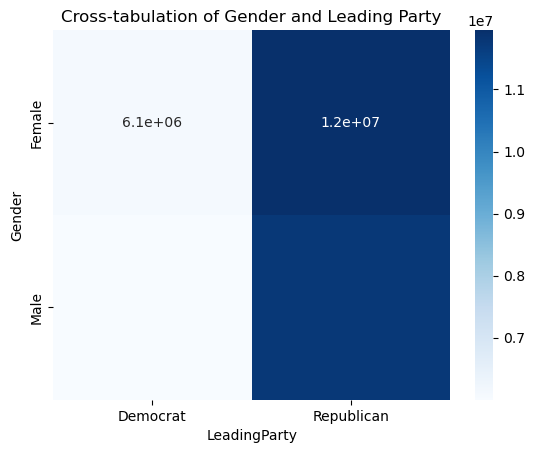

In [59]:
from scipy.stats import chi2_contingency

# Cross-tabulation between Gender and LeadingParty
crosstab = pd.crosstab(df['Gender'], df['LeadingParty'])
chi2, p, dof, expected = chi2_contingency(crosstab)

print("Chi-Square Test:")
print("Chi2 Stat:", chi2)
print("p-value:", p)

# Visualize cross-tabulation
sns.heatmap(crosstab, annot=True,cmap='Blues')
plt.title('Cross-tabulation of Gender and Leading Party')
plt.show()

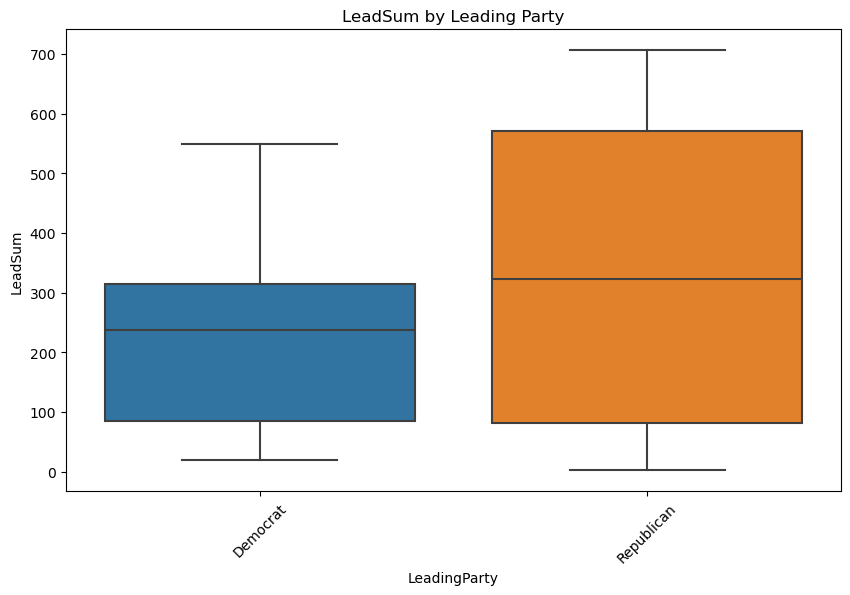

In [62]:
# Box plot of LeadSum by LeadingParty
plt.figure(figsize=(10, 6))
sns.boxplot(x='LeadingParty', y='LeadSum', data=df)
plt.title('LeadSum by Leading Party')
plt.xticks(rotation=45)
plt.show()

**Observations:**

Median (Central Tendency):
The median LeadSum for the Republican party is higher than that for the Democrat party. The median for Republicans appears to be around 400, while for Democrats, it seems to be closer to 250.
Interquartile Range (IQR):

The IQR (the height of the box, between the 25th and 75th percentiles) is larger for the Republican party, indicating a wider range of LeadSum values. This suggests more variability in the Republican group.
For Democrats, the IQR is smaller, indicating that the LeadSum values are more tightly clustered around the median.
Spread (Whiskers and Outliers):

The whiskers (the lines extending from the top and bottom of the box) indicate the range of the data excluding outliers. The whiskers for Republicans extend much further than those for Democrats, indicating that Republicans have a larger range of LeadSum values.
Both parties show a few extreme values (outliers), but they are not as prominent.
Skewness:

Both distributions seem somewhat skewed. For Democrats, the box plot shows a slight skew towards lower values, with the lower whisker being shorter. For Republicans, the distribution seems more symmetric, but the larger IQR indicates more spread.

**Insights:**
Republicans seem to have a higher overall LeadSum and more variation in their values compared to Democrats.
Democrats have a more concentrated LeadSum around the median, meaning that there is less variability in the lead margins.
The data suggests that, generally, Republicans tend to secure larger lead margins (higher LeadSum) in elections than Democrats.

In [64]:
# Mean of numerical columns grouped by LeadingParty
party_means = df.groupby('LeadingParty')[numerical_cols].mean()
print(party_means)

                 Count     LeadSum    LeadAvg   TargetVotes
LeadingParty                                               
Democrat      1.420177  215.959806  11.991444  1.327512e+07
Republican    1.439262  328.588286  10.721664  1.052156e+07


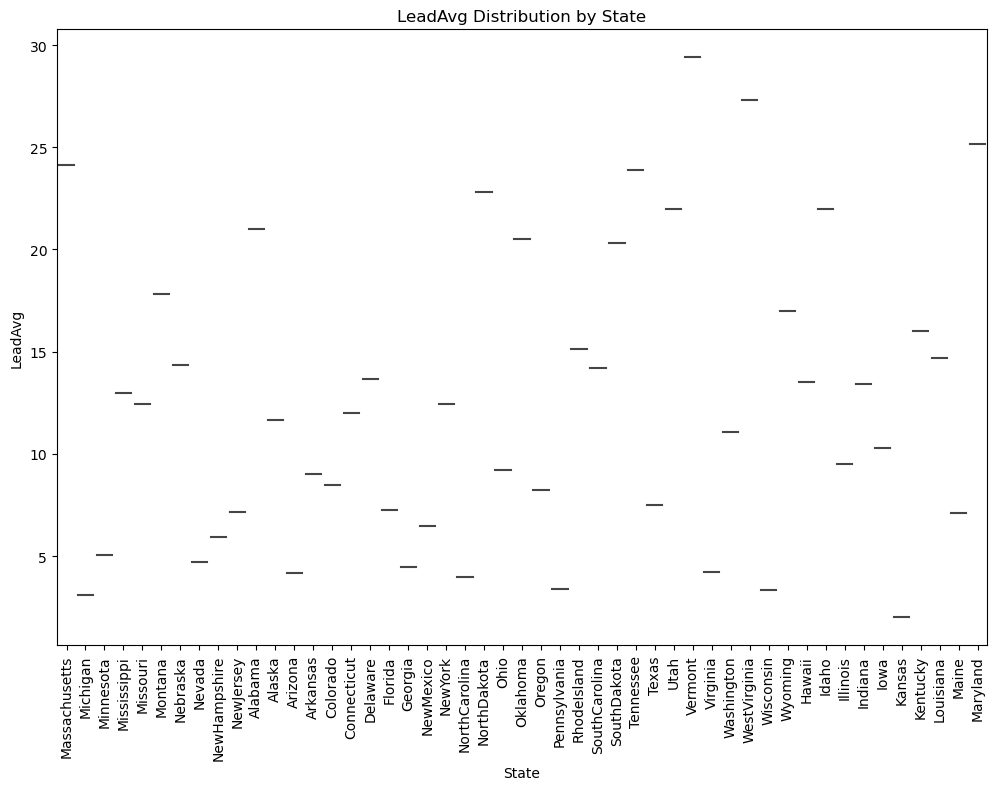

In [66]:
# Violin plot for LeadAvg by State
plt.figure(figsize=(12, 8))
sns.violinplot(x='State', y='LeadAvg', data=df)
plt.title('LeadAvg Distribution by State')
plt.xticks(rotation=90)
plt.show()

                   Count  LeadSum    LeadAvg   TargetVotes
State                                                     
Alabama         1.423320     63.0  21.000000  1.068050e+07
Alaska          1.305482    105.0  11.666667  8.245490e+05
Arizona         1.303454    675.0   4.166667  3.173323e+06
Arkansas        1.445845     18.0   9.000000  1.982605e+06
Colorado        1.481717     85.0   8.500000  1.936647e+07
Connecticut     1.380830     24.0  12.000000  8.898921e+06
Delaware        1.379040     41.0  13.666667  3.658891e+06
Florida         1.089109    494.0   7.264706  3.811688e+07
Georgia        10.191223    680.0   4.444444  1.862591e+07
Hawaii          1.200184     27.0  13.500000  6.975977e+06
Idaho           1.762619     22.0  22.000000  4.163424e+06
Illinois        6.099456     19.0   9.500000  1.825487e+07
Indiana         6.717667     94.0  13.428571  1.245955e+07
Iowa            1.663906     72.0  10.285714  5.589391e+06
Kansas          1.457940      2.0   2.000000  6.860393e+

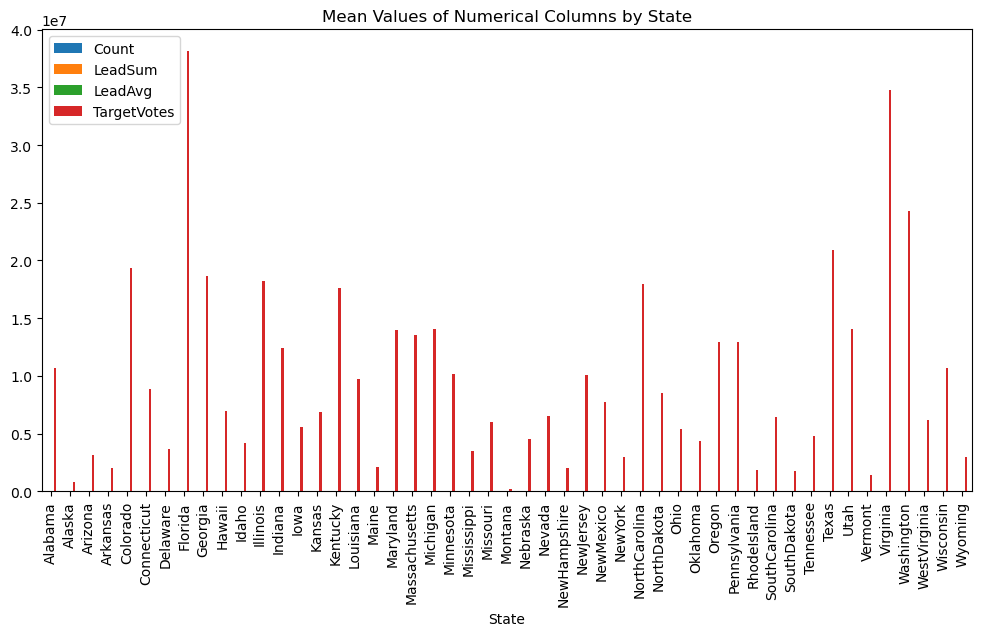

In [69]:
# Group by State and calculate mean of numerical columns
state_summary = df.groupby('State')[numerical_cols].mean()
print(state_summary)

# You can visualize this summary
state_summary.plot(kind='bar', figsize=(12, 6))
plt.title('Mean Values of Numerical Columns by State')
plt.xticks(rotation=90)
plt.show()

In [13]:


# Step 3: Check for non-numeric values in potentially problematic columns
# For example, checking the TotalHouseholdIncome column for non-numeric values
print(df['TotalHouseholdIncome'].unique())  # Inspect unique values

# Step 4: Convert numeric columns to appropriate types if needed
numeric_cols = ['Count', 'LeadSum', 'LeadAvg', 'TargetVotes', 'TotalHouseholdIncome']

# Attempt to convert specified columns to numeric, coercing errors (convert non-convertible values to NaN)
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Step 5: Apply one-hot encoding to categorical variables
categorical_vars = ['Gender', 'Race', 'VeteranStatus', 'DisabilityStatus', 'EmploymentStatus']
df_encoded = pd.get_dummies(df, columns=categorical_vars)

# Step 6: Calculate the correlation matrix
corr_matrix = df_encoded.corr()

# Step 7: Plot the heatmap of the correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Correlation Matrix with One-Hot Encoded Categorical Variables')
plt.show()


['$75,000-$99,999' '$100,000-$149,999' '$50,000-$74,999'
 '$150,000-$199,999' '$15,000-$24,999' '$200,000 or more'
 '$25,000-$34,999' '$35,000-$49,999' '$10,000-$14,999' 'Less than $10,000']


ValueError: could not convert string to float: 'Arts and Entertainment'

Dimentionality Reduction

In [22]:
from sklearn.preprocessing import StandardScaler
numeric_cols = ['Count', 'LeadSum', 'LeadAvg', 'TargetVotes', 'TotalHouseholdIncome']

# Standardize numerical data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numeric_cols])


C:\Users\seren\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\seren\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\seren\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Dimentionality Reduction

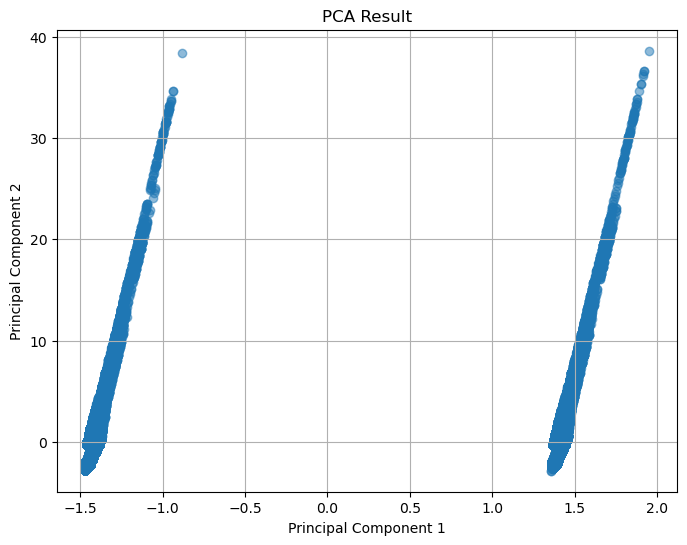

In [40]:

# Select only numeric columns for PCA
numerical_cols = ['Count', 'LeadSum', 'LeadAvg', 'TargetVotes']  # Ensure these are correct
categorical_cols = ['Gender', 'Race', 'VeteranStatus', 'DisabilityStatus', 'EmploymentStatus']

# Separate numeric and categorical data
df_numerical = df[numerical_cols]
df_categorical = df[categorical_cols]

# Step 1: Impute missing values for numeric data
numeric_imputer = SimpleImputer(strategy='mean')
df_numerical_imputed = numeric_imputer.fit_transform(df_numerical)

# Step 2: Impute missing values for categorical data
categorical_imputer = SimpleImputer(strategy='most_frequent')
df_categorical_imputed = categorical_imputer.fit_transform(df_categorical)

# Convert back to DataFrame
df_categorical_imputed = pd.DataFrame(df_categorical_imputed, columns=categorical_cols)

# Step 3: Combine the imputed numeric and categorical data
df_imputed = pd.concat([pd.DataFrame(df_numerical_imputed, columns=numerical_cols), df_categorical_imputed], axis=1)

# Step 4: One-hot encode categorical variables
df_encoded = pd.get_dummies(df_imputed, columns=categorical_cols)

# Step 5: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

# Step 6: Apply PCA
pca = PCA(n_components=2)  # Specify the number of components
X_pca = pca.fit_transform(X_scaled)

# Step 7: Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Step 8: Visualize PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()



**Observations from the Plot**

Linearity: The points in the plot appear to form a line, suggesting that there may be strong linear relationships among the original features. This indicates that much of the data's variance can be explained by a linear combination of a few features.

Spread: The concentration of points along a line could mean that the data might be one-dimensional in its significant variations. If you observe that the points cluster closely, it may indicate low variance.

Outliers: The presence of points that are far from the main cluster could indicate outliers or anomalies in the dataset. These points could have a significant impact on the results of the PCA.

C:\Users\seren\AppData\Local\Temp\ipykernel_12076\4209939514.py:10: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
C:\Users\seren\AppData\Local\Temp\ipykernel_12076\4209939514.py:10: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
C:\Users\seren\AppData\Local\Temp\ipykernel_12076\4209939514.py:10: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
C:\Users\seren\AppData\Local\Temp\ipykernel_12076\4209939514.py:10: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
C:\Users\seren\AppData\Local\Temp\ipykernel_12076\4209939514.py:10: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
C:\Users\seren\AppData\Local\Temp\ipykernel_12076\4209939514.py:10: Ru

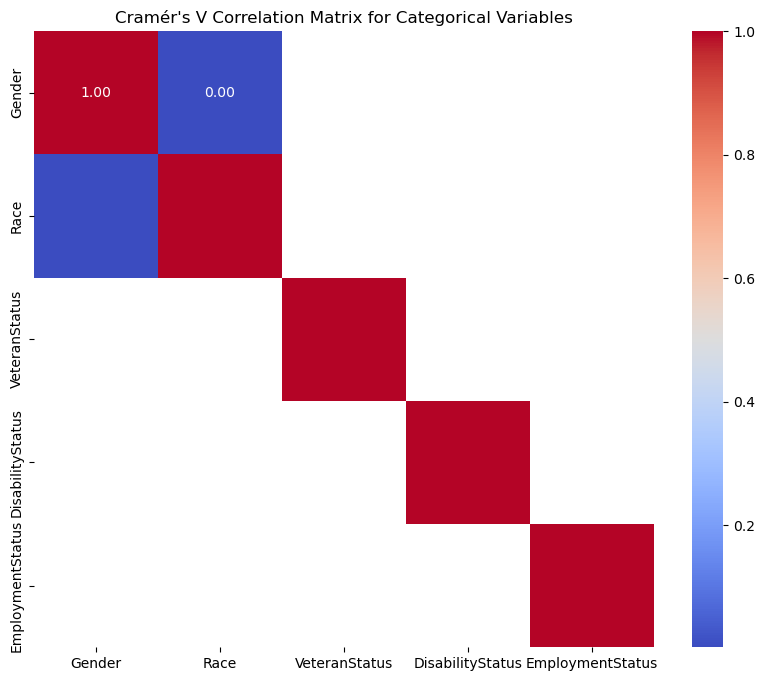

In [83]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ( (r - 1)**2 ) / (n - 1)
    kcorr = k - ( (k - 1)**2 ) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
# List of categorical variables to analyze
categorical_vars = ['Gender', 'Race', 'VeteranStatus', 'DisabilityStatus', 'EmploymentStatus']

# Create a DataFrame to hold Cramér's V values
cramers_v_matrix = pd.DataFrame(index=categorical_vars, columns=categorical_vars)

# Calculate Cramér's V for each pair of categorical variables
for var1 in categorical_vars:
    for var2 in categorical_vars:
        if var1 != var2:
            cramers_v_matrix.loc[var1, var2] = cramers_v(df[var1], df[var2])
        else:
            cramers_v_matrix.loc[var1, var2] = 1.0  # Self-correlation is 1

# Convert to numeric
cramers_v_matrix = cramers_v_matrix.astype(float)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Cramér's V Correlation Matrix for Categorical Variables")
plt.show()
